In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#read data into a Dataframe
data=pd.read_csv(r'C:\Users\Jagruti\Downloads\Advertising.csv',index_col=0,header=0)
#data
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
print(data.dtypes)
print(data.shape)    #it gives no of rows&columns
print(data.describe())  #it gives descriptive statistics of the data

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [10]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

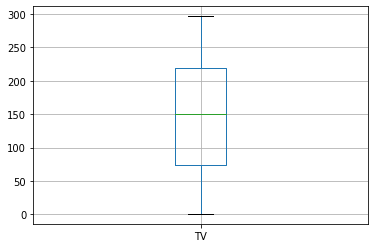

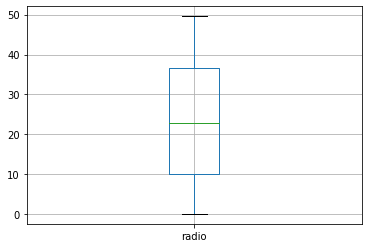

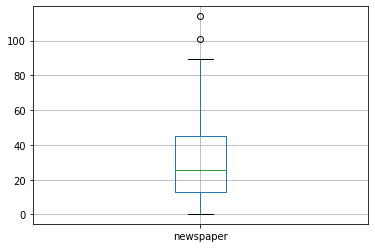

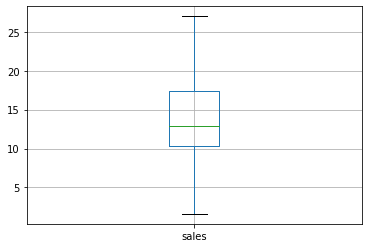

In [12]:
#Assumption 1: There should be no outliers in the data.Check using boxplot

for i in data.columns:
    data.boxplot(column=i)
    plt.show()
    

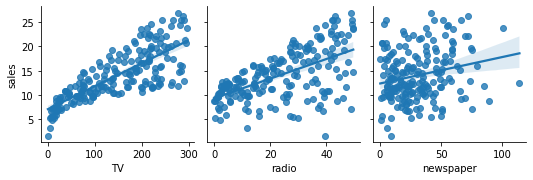

In [7]:
#1. Inform the client when outliers are formed

#Assumption 2:Assumption of Linearity:Every ind var should have a linear relatioship with the dep var.

sns.pairplot(data,x_vars=['TV','radio','newspaper'],
            y_vars="sales",kind='reg')

#If the points are completely scattered then there is no relation.This means there is no dependency between the variables.



In [8]:
#In the above plots there is no relation between newspaper variable. So we can drop it
#data.drop(["newspaper"],axis=1,inplace=True)

In [9]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
#Create X and Y
X =data[['TV', 'radio', 'newspaper']]
Y = data['sales']
#X=data.iloc[:,0:-1]  #For large datasets u can use iloc as it can give to segregation in terms of index no.

In [11]:
Y.shape

(200,)

In [12]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='sales', ylabel='Density'>

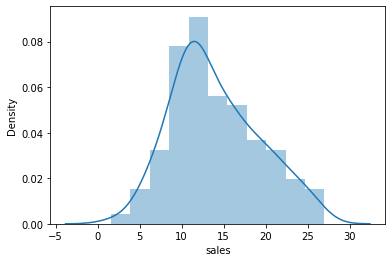

In [13]:
#Assumption of Normality:The dependent variable should follow an approximate normal distribution

sns.distplot(Y,hist=True)

In [14]:
"""
#Log transformation
import numpy as np
Y_log=np.log(Y)
"""
#When the data is heavily skewed we perform transformations on data. Its of 2 types:np.sqrt & np.log.
#We prefer log transformation as it smoothens the curve whereas sqrt just reduce the side of the curve.
#Smoothen graph will reduces the skewness the graph but doesn't remove the skewness.

'\n#Log transformation\nimport numpy as np\nY_log=np.log(Y)\n'

In [15]:
#sns.distplot(Y_log,hist=True)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

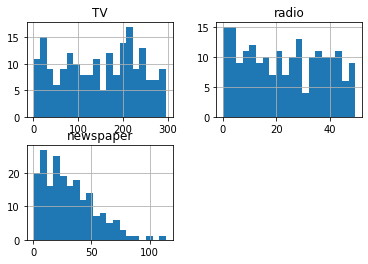

In [16]:
#Its not a assumptions just a good practice
X.hist(bins=20)

In [17]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))  #apply functions helps to apply the logic on each variable
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index]) 
#log()=When the values are zero ,the log will be -infinity which creates a problem 
#log1p()=

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [18]:
#Assumption of no multicollinearity: There should be no multicollinearity between the independent variables

corr_df=X.corr(method='pearson')
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


<AxesSubplot:>

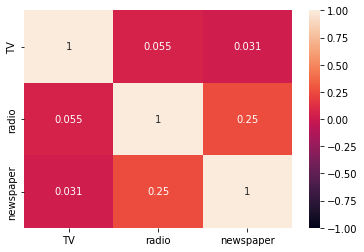

In [19]:
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)



,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [21]:
#X.drop("newspaper",axis=1,inplace=True)
#rerun the VIF code

In [22]:
#When all VIF values fall in a range then it is said to be "Full Rank Matrix"

In [23]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-80

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [25]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()

#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]


In [26]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742166), ('radio', 0.1930370789734531), ('newspaper', -0.048951368222487836)]


In [27]:
#Manual prediction is not an ideal approach but we use it to predict model if the client is telling to predict the less values
#taking all variables into consideration
X1=100
X2=100
X3=np.log1p(100)

Y_pred = 3.3532913858151474+( 0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

26.805332913800658


In [28]:
#if we are eliminating the newspaper variable there is increase in sales
X1=100
X2=100
X3=np.log1p(0)

Y_pred = 3.3532913858151474+( 0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

27.031249385815148


In [29]:
#If the values of radio variable are increased as it shows more increase,So the sales value also increases drastically
X1=100
X2=200
X3=np.log1p(0)

Y_pred = 3.3532913858151474+( 0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.334957385815144


In [30]:
#Y_test is always used for comparison not for testing

#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [31]:
#score function helps to predict how well your model is with X_train & Y_train values
#It is the R**2 for training data.
lm.score(X_train,Y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.9208986647500219

In [32]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [33]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [34]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [35]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [36]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-80

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [37]:
from sklearn.linear_model import Ridge
#create a model object
lm = Ridge()

#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [38]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.14984366 12.961602   18.05844603 23.66046356 20.68752578 14.26318679
 14.9278479  21.38857787 21.14736702 12.75811738 23.99745819  7.20656373
 12.30813313 19.22822402 19.41619189 13.44941112 19.62559951  9.24628306
 21.1051215  20.87807898 15.52579217 10.91642817 22.82923662 15.82939321
 17.40752649  8.17207209 11.88688403 12.69878967 21.71245614  7.94914659
 12.49142141 20.43289143  4.71465713  4.7216782  16.75029355 15.74408175
  6.74767421 17.73713545  9.01204512 13.60840942]


In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975934
RMSE: 2.592920462683998
Adj R-square: 0.832279819566434


In [40]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-80

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [41]:
from sklearn.linear_model import Lasso
#create a model object
lm = Lasso()

#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [42]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.06429565 12.89291061 18.06240985 23.59022036 20.60240696 14.24765273
 14.95215852 21.28397604 21.03270918 12.70073142 23.91262327  7.30875314
 12.27479157 19.18615151 19.40987087 13.37169781 19.52635995  9.18340605
 21.01174436 20.74314144 15.48896526 10.79867965 22.74877319 15.78495133
 17.45553519  8.22914947 11.77231457 12.65310134 21.59003277  7.96379194
 12.53499059 20.35780103  4.83670342  4.8659235  16.78762249 15.83910155
  6.83541797 17.72822269  9.10768074 13.67675885]


In [43]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292
